# Data 201

Data Wrangling, S2 2019

## Assignement 1

**20% of final grade** Total marks is **100 marks** (100 for R).

## Due date: 11am Friday 23 August 2019

The assignment must be submitted on the DATA 201 and 422 Learn page and should be **your own work**.

### Avoid plagiarism (see this [video on academic plagiarism](https://www.youtube.com/embed/reGGPUrEsC0) ). If you are not sure what may constitute code plagiarism, read this [explanation on source code plagiarism](http://web.science.mq.edu.au/~mtaylor/ponline/index.php?id=source-code-plagiarism). Remember, when in doubt **declare your sources**. 

If you have any issues that affects your ability to work during the time allocated for the assignement, please DO CONTACT ME. We will find a suitable solution. In general this WON'T be an extension to the deadline (so that in the rest of the semester you are free from preoccupations). Most probably, I will ask you to submit what you have ready by the time the assignment is due, even if it is not everything we required, and I'll take into account special considerations. For any particular problem, please contact [Giulio Dalla Riva](giulio.dallariva@canterbury.ac.nz) or the TAs (using keybase).

## Instruction

For this assignment you will work with a _.csv_ data-set. Your goal is to read it in, wrangle it, produce some plotting, in order to demonstrate that you are able to use the functions, plotting, and markdown format we have been learning.  
You shall hand in your work as a jupyter-lab R notebook comprehending the code, the plots and, **very important**, enough comments and explanations for us to understand what you did, how you did it, and why you did it. Remember: no comments, no marks.  
You can either modify this notebook or write a new one from scratch: in that case, clearly indicate which question you are asking at each step. Notice that you may well want to **use more than one cell** per answer (using some cell for the code, some for the text, and so forth).

## Comment, explain, present your work in a clear way (10 marks)

## R part (overall 100 marks)

Do use the tidyverse syntax I introduced in class and labs. If in doubt, refresh the lab material 1 to 4.

The first thing you may want to do is to load **tidyverse**:

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Task (a): import (10 marks)

Import the **hour.csv** dataset into R as a dataframe (we'll call it `bike_df`, but you can call it what you want). You can read about the dataset in the file `DataSet_Dictionary.txt`. (Alternatively, you might use your own .csv dataset of choice, but talk with me about it before doing it). 

Then perform the routine checks about the types of the columns, the missing values, and output a quick summary of the dataset.

_hint_ useful functions: `read_csv()`, `glimpse()`  
_hint_ useful libraries: `tidyverse`, `readr`, `skimr`, `vis_dat`

In [2]:
library(visdat)

In [3]:
library(skimr)


Attaching package: ‘skimr’

The following object is masked from ‘package:stats’:

    filter



In [4]:
bike_df <- "hour.csv" %>%
  read_csv()

Parsed with column specification:
cols(
  instant = col_double(),
  dteday = col_date(format = ""),
  season = col_double(),
  yr = col_double(),
  mnth = col_double(),
  hr = col_double(),
  holiday = col_double(),
  weekday = col_double(),
  workingday = col_double(),
  weathersit = col_double(),
  temp = col_double(),
  atemp = col_double(),
  hum = col_double(),
  windspeed = col_double(),
  casual = col_double(),
  registered = col_double(),
  cnt = col_double()
)


In [7]:
bike_df %>%
  glimpse()

Observations: 17,379
Variables: 17
$ instant    <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,…
$ dteday     <date> 2011-01-01, 2011-01-01, 2011-01-01, 2011-01-01, 2011-01-0…
$ season     <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ yr         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ mnth       <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ hr         <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, …
$ holiday    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ weekday    <dbl> 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6…
$ workingday <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ weathersit <dbl> 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3…
$ temp       <dbl> 0.24, 0.22, 0.22, 0.24, 0.24, 0.24, 0.22, 0.20, 0.24, 0.32…
$ atemp      <dbl> 0.2879, 0.2727, 0.2727, 0.2879, 0.2879, 0.2576, 0.2727, 0.…
$ hum        <dbl

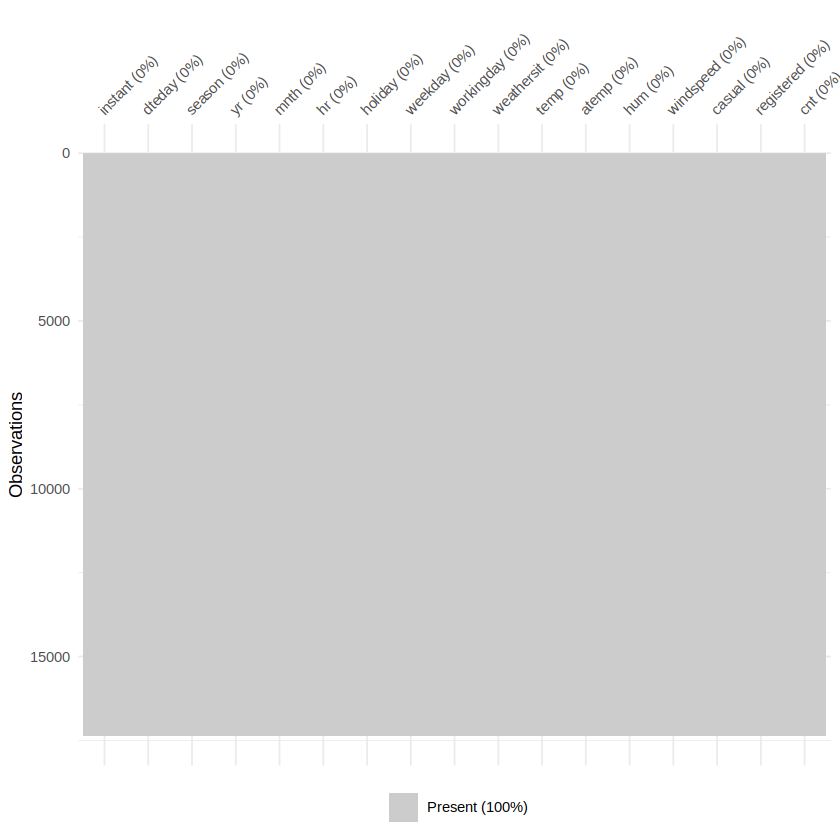

In [8]:
bike_df %>%
  vis_miss()

In [75]:
bike_df%>%
  summary()

    instant          dteday               season            yr        
 Min.   :    1   Min.   :2011-01-01   Min.   :1.000   Min.   :0.0000  
 1st Qu.: 4346   1st Qu.:2011-07-04   1st Qu.:2.000   1st Qu.:0.0000  
 Median : 8690   Median :2012-01-02   Median :3.000   Median :1.0000  
 Mean   : 8690   Mean   :2012-01-02   Mean   :2.502   Mean   :0.5026  
 3rd Qu.:13034   3rd Qu.:2012-07-02   3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :17379   Max.   :2012-12-31   Max.   :4.000   Max.   :1.0000  
      mnth              hr           holiday           weekday     
 Min.   : 1.000   Min.   : 0.00   Min.   :0.00000   Min.   :0.000  
 1st Qu.: 4.000   1st Qu.: 6.00   1st Qu.:0.00000   1st Qu.:1.000  
 Median : 7.000   Median :12.00   Median :0.00000   Median :3.000  
 Mean   : 6.538   Mean   :11.55   Mean   :0.02877   Mean   :3.004  
 3rd Qu.:10.000   3rd Qu.:18.00   3rd Qu.:0.00000   3rd Qu.:5.000  
 Max.   :12.000   Max.   :23.00   Max.   :1.00000   Max.   :6.000  
   workingday       weather

### Task (b): working on rows (10 marks)


Working on `bike_df`, show that you can operate on rows: arranging them, getting the top _n_ according to some variable of your choice, filtering them (eventually using your own functions).

_hint_ useful functions: `arrange()`, `top_n()`, `filter()`  
_hint_ to define a function: `myfunction <- function(myargument,anotherargument) { bodyofthefunction }`

In [ ]:
"head(3)"を提出する前に消してください！！

In [9]:
bike_df %>%
arrange(temp) %>%
head(3)
#arrange the row by temp column in ascending order.

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
484,2011-01-22,1,0,1,4,0,6,0,2,0.02,0.0152,0.48,0.2985,0,3,3
485,2011-01-22,1,0,1,6,0,6,0,2,0.02,0.0303,0.44,0.2239,0,2,2
486,2011-01-22,1,0,1,7,0,6,0,1,0.02,0.0152,0.44,0.2836,0,8,8


In [11]:
bike_df %>%
top_n(3, temp) %>%
head(3)
#get ALL the rows with 3 top(highest) temp data.

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4769,2011-07-22,3,0,7,14,0,5,1,1,0.96,1.0000,0.48,0.2985,24,77,101
4935,2011-07-29,3,0,7,12,0,5,1,1,0.96,0.8636,0.31,0.2836,40,95,135
4937,2011-07-29,3,0,7,14,0,5,1,1,0.96,0.8636,0.30,0.2239,34,114,148


In [12]:
bike_df %>%
filter(mnth == 7) %>%
head(3)
#filters every row that has not got 7 as their mnth.

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4251,2011-07-01,3,0,7,0,0,5,1,1,0.66,0.6212,0.50,0,20,48,68
4252,2011-07-01,3,0,7,1,0,5,1,1,0.66,0.6212,0.50,0,15,16,31
4253,2011-07-01,3,0,7,2,0,5,1,1,0.62,0.6061,0.69,0,6,7,13


In [6]:
bike_df %>%
  filter(mnth %in% c(7, 1)) %>%
  head(3)
#filter every row that has not got 1 or 7 as their mnth.

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0,5,27,32


In [44]:
my_function <-　function(){
    
}

bike_df %>%
my_function(2)

ERROR: Error in my_function(., 2): unused argument (2)


### Task (c): working on columns (10 marks)

Working on `bike_df`, show that you can operate on columns: selecting some of them, dropping other, renaming them, reordering them, ...


_hint_ useful functions: `select()`, `rename()`, ...

In [59]:
bike_df %>%
select(temp:hum) %>%
select(-hum) %>%
head(3)
#select and show only the temp column to hum column, then drop hum column.

temp,atemp
<dbl>,<dbl>
0.24,0.2879
0.22,0.2727
0.22,0.2727


In [56]:
bike_df2 <- rename(bike_df, temperature = temp)

bike_df2 %>%
head(3)
#change temp column name to temperature.

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temperature,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0,5,27,32


In [75]:
bd <- bike_df[,c(3, 2, 1)]

bd %>%
head(3)
#get first, second and last column to be in descending order.

season,dteday,instant
<dbl>,<date>,<dbl>
1,2011-01-01,1
1,2011-01-01,2
1,2011-01-01,3


### Task (d): groups and not (10 marks)

Working on `bike_df`, show that you can produce new variables (columns) and modify existing one; show also that you can operate on the dataframe as a whole and on groups. See *Readme.txt* to get an understanding of the variable scaling applied.

_hint_ useful functions: `mutate()`, `group_by()`, `summarise()`, `tally()`, ...

In [71]:
bike_df %>%
mutate(RANDOM = hr + mnth) %>%
head(3)
# make a new column called RANDOM that is total of mnth and hr.

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,RANDOM
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16,1
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0,8,32,40,2
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0,5,27,32,3


In [78]:
bike_df %>%
summarise(median_temp = median(temp))
# take all the value from temp column and get an average

median_temp
<dbl>
0.5


In [73]:
bike_df %>%
group_by(mnth) %>%
summarise(median_temp = median(temp))
# create table of average temp grouping the row by mnth.

mnth,median_temp
<dbl>,<dbl>
1,0.22
2,0.30
3,0.38
4,0.46
5,0.60
6,0.68
7,0.74
8,0.70
9,0.62


In [11]:
bike_df %>%
group_by(mnth) %>%
tally() %>%
arrange(desc(n))
# make a sorted table to see how many entries are there for each mnth in the bike_df (may has the most entries)

mnth,n
<dbl>,<int>
5,1488
7,1488
12,1483
8,1475
3,1473
10,1451
6,1440
4,1437
9,1437


### Task (e): wide, long, tidy (10 marks)

Show that you can go back and forth between the long and the wide format of a dataframe. Then produce a tidy version of `bike_df` (or, if you think the original one is is already in the tidy data shape, explain why).

_hint_ useful functions: `spread()`, `gather()`, `na.omit()`, ...

In [ ]:
hours.csv is already a tidy as it has columns as a type of data input, row as one entry of a data 
and cells have data inputs with correct parsing and no empty cells.

In [69]:
wide <- bike_df %>% spread(key = season, value = hr)

wide %>%
head(30)
# spread season with value of hr in it.

wide %>%
gather(key = season, value = hr, 16:19)%>%
na.omit()
# gather the season 1 2 3 4 and make column called season.

#skim()%>%
#kable()
#check if there is 4 seasons and 0 to 23 as hr.

instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,1,2,3,4
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,0,1,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,0,NA,NA,NA
2,2011-01-01,0,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,1,NA,NA,NA
3,2011-01-01,0,1,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,2,NA,NA,NA
4,2011-01-01,0,1,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,3,NA,NA,NA
5,2011-01-01,0,1,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,4,NA,NA,NA
6,2011-01-01,0,1,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,5,NA,NA,NA
7,2011-01-01,0,1,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,6,NA,NA,NA
8,2011-01-01,0,1,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,7,NA,NA,NA
9,2011-01-01,0,1,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,8,NA,NA,NA


instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season,hr
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,2011-01-01,0,1,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,1,0
2,2011-01-01,0,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,1,1
3,2011-01-01,0,1,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,1,2
4,2011-01-01,0,1,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,1,3
5,2011-01-01,0,1,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1,4
6,2011-01-01,0,1,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,1,5
7,2011-01-01,0,1,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,1,6
8,2011-01-01,0,1,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,1,7
9,2011-01-01,0,1,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,1,8


### Task (f): plot (10 marks)

Produce a beautiful graphical representation of the data in `bike_df` or of _some_ of the data in `bike_df`. You can try different geometries, themes, mappings, ... . Make sure you label the plots with titles, and axis labels. Notice that the focus is on the use of *plotting as a data model*, rather than on the *statistical modelling* of the data.
\[ Hint: if you can't find any plotting idea, try focusing on the count of total rental bikes, and how it varies through time, season, weather, temperature, humidty, wind-speed. \]

_hint_ useful functions: `ggplot()`, `ylab()`, `xlab()`, `geom_...()`, `aes()`, `facet_...()`, ...

In [6]:
# your answer here

### Task (g): save (10 marks)

Save your plot from Task (f) and your tidy dataset from Task (g) to disk. 

_hint_ useful functions: `write_csv()`, `ggsave()`,...

In [6]:
# your answer here

### Challenge question (20 marks)

You are the data scientist working for a bike rental company. The `hour.csv` is the data you have available. The bike rental CEO sometimes wakes up in the morning with these strange ideas, and you get to test them.

One of the key element for the company is being sure that there are always enough bikes available for the users. So, we need to understand what makes a user rent a bike and what makes a user NOT rent a bike.
Your CEO noticed thinks that one of the peak times for the registered users renting bikes is between 6am and 10am.

Task (1): make a plot to check that (take seasonality into account in the plot).

She also thought about an interesting hypothesis. A registered user usually finish working around 5pm. Between 5pm and 10pm, they notice the weather: in particular, the registered users are sensible to how good the weather is, and how stable it is. The morning after, between 6am and 10am, the amount of registered users renting a bike to go to work depends on the previous afternoon weather.

Task (2): make one or more plot to test this hypothesis (again, consider seasonality in the plot).

In [ ]:
# your code goes here